### ✒️Chapter03 : **Neural Network**

- 신경망의 개요(활성화함수) 
- 신경망에서 데이터를 처리하는 과정 설명.
    - 다차원 배열 계산 방법
    - 신경망 구현하기
    - 출력층 설계하기
    - 실습 : 손글씨 인식

퍼셉트론 알고리즘으로 복잡한 함수를 표현할 수 있게 되었다. 하지만 가중치와 임계값은 수동으로 찾아야한다.   
적절한 가중치와 임계값을 찾기 위해 데이터 기반으로 학습을 시키는데, 데이터로부터 적절한 값을 찾는 알고리즘은 신경망을 기반으로 한다.   


---

#### Activation function
활성화 함수 **h(x)** 는 입력 신호의 총합이 활성화를 일으키는지 정하는 역할이다.   
즉, h(x)에 입력값a(a = x1w1+x2w2+b)를 넣으면, h(a) = y로 신호가 0or1로 되는지 정해주는 함수이다.

##### 1.1 step function
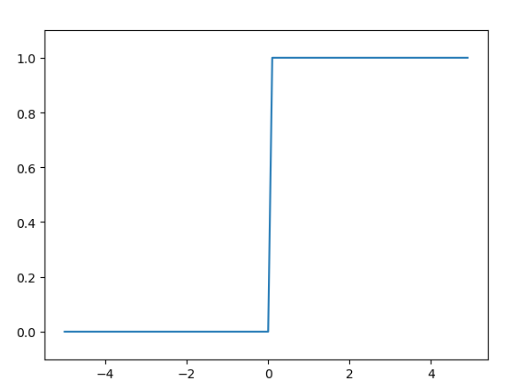   
   
입력이 0 이상이면 1출력   
그 외에는 0을 출력하는 함수.


In [1]:
import numpy as np
x = np.array([-1,1,2])
x

array([-1,  1,  2])

In [3]:
y = x>0
y

array([False,  True,  True])

In [4]:
y = y.astype(np.int)
y

C:\Users\DANIK\AppData\Local\Temp\ipykernel_28464\1284355088.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


array([0, 1, 1])

##### 1-2. sigmoid function

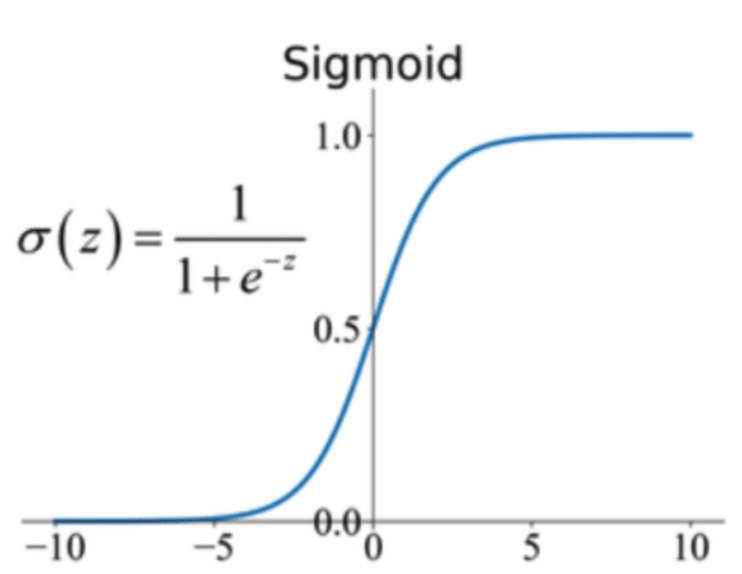

$h(x)=\frac{1}{1+e^-x} = \frac{e^x}{e^x+1}$   
   

- **S자 형태**로 입력값이 증가함에 따라 S모양으로 변한다. 부드럽게 변화함을 의미.    
- **비선형 함수** 시그모이드 함수는 비선형 함수로 분류된다.    
- **확률값 변환** 시그모이드 함수는 0~1 사이의 확률값으로 변환한다.


In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [6]:
x = np.array([-1,1,2])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

> 정리 및 비교   

- sigmoid함수는 부드럽게 변화하지만, step함수는 0을 경계로 확 바뀐다.   
즉, 퍼셉트론에서 뉴런은 0 or 1로 흐른다면, 신경망에서는 연속적인 실수가 흐른다.
- 비선형 함수 : sigmoid와 step함수는 비선형 함수로, 선형함수로는 신경망의 층을 깊게 쌓을 수 없다. 층을 쌓기 위해서는 무조건 비선형 함수.

##### 1-3. ReLU
Rectified Linear Unit, 렐루   

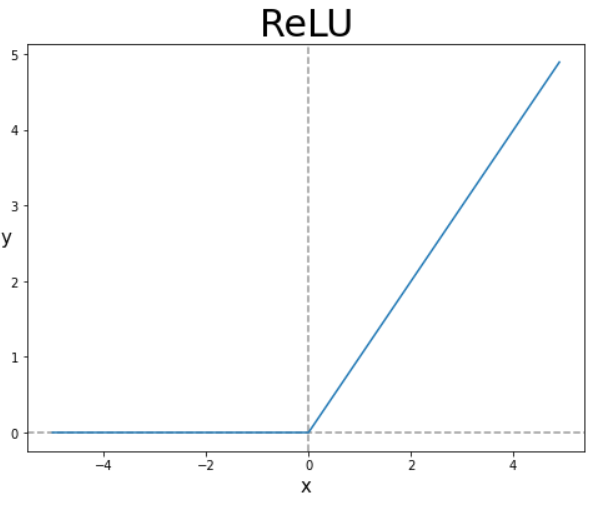   
입력이 0이 넘으면 해당값을 그대로 출력하고, 0 이하이면 무조건 0을 출력

In [7]:
def relu(x):
    return np.maximum(x,0)

In [8]:
x = np.array([-1,1,2])
relu(x)

array([0, 1, 2])

### summary : Activation function

1️⃣ **sigmoid function**    

장점)
- 입력값에 대한 부드러운 변화(S자 형태)
- 비선형 함수로 신경망의 층을 쌓을 수 있음

단점)      
- 그래디언트 소실(Vanishing Gradient Problem) : sigmoid의 입력값이 크거나 작을 경우, 그래디언트 값이 매우 작아져서 학습이 어려워지는 문제로, 신경망 레이어가 많이 쌓아질수록 그래디언트 정보가 손실되어 학습이 제대로 이뤄지지 않음.
- Output Centered Problem : sigmoid 함수의 출력값 평균은 0.5로 중심이 되어 있기 때문에 데이터 분포가 0.5로 고르지 못하면 학습이 제대로 되지 못함.
        

2️⃣ **ReLU function**    

장점)
- 기울기 소실 문제 해결
- 기존 활성화 함수에 비해 속도가 매우 빠름 : 경사 하강 시 학습 속도가 빠른편

단점)
- 음수 값은 모두 0으로 반환. 입력값이 음수이면 기울기가 0이 되어 가중치 업데이트가 안됨.
- tip : 은닉층에서만 ReLu함수 사용을 권장함
- sigmoid함수처럼 지그재그로 가중치를 찾아가는 현상이 발생

---

##### 다차원 배열의 계산    
다차원 배열 계산에 대한 설명과 구현 파트

2-1. 다차원 배열

In [14]:
import numpy as np
# nums = np.array([1, 2, 3, 4])
nums = np.array([[1,2],[4,3],[5,6]])    # 3행 2열 = 3rows 2cols = 3X2
print(nums)

[[1 2]
 [4 3]
 [5 6]]


In [15]:
# nums 배열의 차원
print(np.ndim(nums))

2


In [21]:
# 2차원 배열의 원소 3개
print(nums.shape)
row = nums.shape[0]
col = nums.shape[1]

(3, 2)


2-2. 행렬곱

In [23]:
A = np.array([[1, 2], [3, 4]])
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
np.dot(A, B)            # 행렬곲 함수 : np.dot(행렬,행렬)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

2-3. 신경망에서의 행렬 곱    
*그림 3-14!*

In [35]:
X = np.array([1, 2])
print("X(입력값) : ")
print(X)
print()

W = np.array([[1, 3, 5], [2, 4, 6]])
print("가중치 배열 : ")
print(W)
print()

Y = np.dot(X, W)
print(Y)

X(입력값) : 
[1 2]

가중치 배열 : 
[[1 3 5]
 [2 4 6]]

[ 5 11 17]


---

##### 3. 3층 신경망 구현하기    


In [42]:
X = np.array([1.0, 0.5])    # 입력값 2행 1차원
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 가중치 2행 3차원
B1 = np.array([0.1, 0.2, 0.3]) # 편향 2행 1차원 :

# print(W1.shape) # (2, 3)
# print(B.shape)  # (2, 3)
# print(X.shape)  # (2,)

# 퍼셉트론 수식 = x1w1+x2w2+b
x = np.dot(X, W1) + B1
print("입력 신호의 총합(가중치,편향): ",x)

입력 신호의 총합(가중치,편향):  [0.3 0.7 1.1]


In [45]:
# 시그모이드 함수 사용
layer1 = sigmoid(x)

# print(x) # [0.3, 0.7, 1.1]
print("1층 은닉층의 값 :",layer1) # [0.57444252, 0.66818777, 0.75026011]

1층 은닉층의 값 : [0.57444252 0.66818777 0.75026011]


In [46]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

# print(layer1.shape) # (3,)
# print(W2.shape) # (3, 2)
# print(B2.shape) # (2,)

x2 = np.dot(layer1, W2) + B2
layer2 = sigmoid(x2)
print("2층 은닉층의 값 :",layer2)

2층 은닉층의 값 : [0.62624937 0.7710107 ]


In [47]:
def identity_function(x):
    # 항등 함수 : 출력층의 활성화 함수로 이용함.
    # 출력층의 활성화 함수를 시그마로 표시함.(기존의 활성화함수인 시그모이드(h)와는 다른 표기)
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(layer2, W3) + B3
Y = identity_function(A3) # 혹은 Y = A3

print("출력값 :",Y)

출력값 : [0.31682708 0.69627909]


##### 구현 정리하기

In [49]:
def init_network():
    ''''
    신경망의 각 가중치와 편향을 설정함.
    딕셔너리 리턴.
    '''
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    '''
    입력신호를 출력으로 변환하는 모든 과정을 구현
    *forward : 신호가 순방향으로 전달됨을 의미
    '''
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [50]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [0.31682708 0.69627909]

[0.31682708 0.69627909]


---

##### 4. 출력층 설계하기

> NOTE :    
    
출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정함.
- 회귀 => 항등함수
- 2클래스 분류 => 시그모이드 함수
- 다중 클래스 분류 => 소프트맥스 함수

- 항등함수 identity function
- 소프트맥스 softmax function
    - $y_k=\frac{exp(a_k)}{\sum_{i=1}^{n} exp(a_i)}$   
    *$y_k$는 n개의 출력층 뉴런 중 k번째 출력

##### 4-1. 소프트맥스 함수

In [51]:
a = np.array([0.3, 2.9, 4.0])       # 입력신호 a1

exp_a = np.exp(a) # a1의 지수 함수 :: 소프트맥스의 분자 부분
print(exp_a)

sum_exp_a = np.sum(exp_a) # 지수 함수의 합 :: 소프트맥스의 분모 부분
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)


[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


> Note    

컴퓨터로 소프트맥스를 구현할 때, 오버플로 문제를 주의해야함.    
위 문제를 주의하기 위해, 입력값 중 최대값을 빼주면 됨.    
    
*Q.입력값의 최대값이 이상치라면 오류가 생기지 않을까? ex) input = [10000000,1,2]*    
*page93 식3.11에 대해 이해 부족*

In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

- 출력층의 뉴런 수는 적절히 설정해야함.

---

##### 5. 실습 : 손글씨 숫자 인식

손글씨 숫자 분류 구현하기.    
학습과정은 생략, 추론 과정만 구현   
*추론과정 : 신경망의 순전파forward propagation

눈으로 코드 읽기    
*https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/dataset/mnist.py*

In [ ]:
# mnist.py에서 아래와 같이 설정함.   

# train_num = 60000
# test_num = 10000
# img_dim = (1, 28, 28)
# img_size = 784

In [ ]:
def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNIST 데이터 읽기
    
    Parameters
    ----------
    normalize : 입력 이미지의 픽셀값을 0.0~1.0 사이 값으로 정규화(False : 0~225사이의 값 유지)
    one_hot_label :
        one_hot_label이 True이면, one-hot encoding하여 저장.
        one-hot encoding이란, [0,0,1,0,0,0,0,0,0,0]처럼 정답은 1 나머지는 모두 0
        위 예제에서는 3번째 원소가 1이기 때문에 3클래스로 분류됨.
    flatten : 1차원 배열로 설정 여부(False : 1,28,28 배열/ True : 784원소 1차원)

    Returns
    -------
    (훈련 이미지, 훈련 레이블), (테스트 이미지, 테스트 레이블)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
        # pickle : 프로그램 실행 중에 특정 객체를 파일로 저장하는 기능
        # 저장해둔 pickle파일을 로드하면 실행 당시의 객체를 복원할 수 있음.
        ## 보통 학습한 매개변수 값들을 기록한 파일들

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])



In [ ]:
# import sys, os
# sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
# from dataset.mnist import load_mnist

# # 처음 한 번은 몇 분 정도 걸립니다.
# (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# # 각 데이터의 형상 출력
# print(x_train.shape) # (60000, 784)
# print(t_train.shape) # (60000,)
# print(x_test.shape)  # (10000, 784)
# print(t_test.shape)  # (10000,)

신경망의 추론 처리

In [ ]:
import pickle

def get_data():
    '''
    mnist에서 데이터 가져오기
    
    Returns
    ---
    테스트 이미지, 테스트 레이블
    '''
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label = False)
    return x_test, t_test

def init_network():
    '''
    sample_weight.pkl : 학습된 가중치 매개변수 파일(딕셔너리로 저장됨)
    
    Returns
    ---
    딕셔너리
    '''
    
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    '''
    추론 함수 - 신경망 구현하기
    
    Parameters
    ---
    network : 가중치 값 정보
    x : 입력값
    
    Returns
    ---
    출력값
    '''
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [ ]:
"""
x, t = get_data()           # mnist데이터 (테스트용)
network = init_network()    # 가중치 데이터 설정하기
accuracy_cnt = 0            # 신경망 답변과 정답 비교하여 맞은 갯수

for i in range(len(x)):
    y = predict(network, x[i])          # 테스트 데이터를 하나씩(row) 예측
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))
"""

> Note 

첫번째 데이터 (1,784), W1(784,50), W2(50,100), W3(100,10) = y(1,10)   
데이터가 100개가 된다면, (100,784) ~ = y(100,10)   
   
하나로 묶인 입력 데이터를 배치batch라 한다.   
배치 처리를 수행함으로 큰 배열로 이뤄진 계산을 하게 되는데, 컴퓨터에서는 큰 배열을 한번에 계산하는 것이 분할된 작은 배열을 여러번 계산하는 것 보다 빠르다.    
    
*Q.큰 배열 연산은 cpu,gpu가 좋아야 의미있는 거 아닌가?*

In [ ]:
'''
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0
for i in range(0, len(x), batch_size):      # 배치 사이즈만큼 데이터를 불러옴
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)          # argmax(): 최대값의 인덱스를 가져옴
                                            # axis = 1 : (100,10)배열 중 1번째 차원을 구성하는 각 원소에서(1번째 차원축 기준으로) 최대값 인덱스를 찾는 것
                                            # 0은 각 열을 따라 가장 높은 값의 인데스 위치!! 반환
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))
'''

----

### ✅ Issue :

1. softmax function :   
*Q.입력값의 최대값이 이상치라면 오류가 생기지 않을까? ex) input = [10000000,1,2]*    
*page93 식3.11에 대해 이해 부족*

2. batch size :   
*Q.큰 배열 연산은 cpu,gpu가 좋아야 의미있는 거 아닌가?*   

~~3. 컴퓨터 상에서의 배열 의미(np.array)   
배열의 shape가 (2,1)일때, 2행1열 = 데이터 2개 1차원??   
np.argmax(input,axis=1) 계산은 어떻게 되는거지???~~   
argmax는 인덱스 위치를 반환함.
